# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Oscar Oktorian Almando
- **Email:** oscarterraria.almando@gmail.com
- **ID Dicoding:** oscar021

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling banyak dan paling sedikit terjual?
- Kategori produk apa yang memiliki rating tertinggi dan terendah?
- Metode pembayaran apa saja yang dipilih oleh pelanggan dan berapa banyak uang yang digunakan pada metode pembayaran tersebut?
- Bagaimana demografi pelanggan yang melakukan pemesanan?
- Bagaimana performa pemesanan barang berdasarkan status pemesanan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import openpyxl as oxl

## Data Wrangling

### Gathering Data

Dataset yang dikumpulkan terdiri dari 9 file dengan ekstensi csv.  

In [60]:
customers_df = pd.read_csv('data/customers_dataset.csv')

customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')

geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv('data/order_items_dataset.csv')

order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')

order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')

order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv('data/orders_dataset.csv')

orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_df = pd.read_csv('data/product_category_name_translation.csv')

product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv('data/products_dataset.csv')

products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv('data/sellers_dataset.csv')

sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Data `customers_df`

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Tidak ada masalah pada tipe data dan tidak ada *missing value* yang ditemukan di `customers_df`.

In [12]:
print("Duplicate counts : ", customers_df.duplicated().sum())

Duplicate counts :  0


Tidak ditemukan duplikasi data pada `customers_df`.

#### Data `geolocation_df`

In [13]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Tidak ada masalah pada tipe data dan tidak ada *missing value* yang ditemukan di `geolocation_df`.

In [14]:
print("Duplicate: ", geolocation_df.duplicated().sum())

Duplicate:  261831


Terdapat total **261831** data yang terduplikasi pada `geolocation_df`.

#### Data `order_items_df`

In [15]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Data pada `order_items_df` sudah lengkap, namun terdapat kesalahan tipe data pada kolom `shipping_limit_date` yang seharusnya bertipe data `date` bukan `object`.

In [16]:
print("Duplicate: ", order_items_df.duplicated().sum())

Duplicate:  0


Tidak ada data yang terduplikasi pada `order_items_df`.

In [17]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Tidak ada *innacurate value* yang terlihat secara sekilas. Namun terdapat sedikit keanehan pada nilai minimum kolom `freight_value` yang bernilai 0. Freight value adalah biaya pengiriman barang yang dipesan, tentunya terdapat beberapa faktor mengapa freight value bisa bernilai 0, beberapa kemungkinannya adalah pengiriman terjadi di kota yang sama dan terdapat promosi gratis biaya kirim. Karena tidak adanya konteks mengenai promosi pemesanan barang di dataset, maka perlu diperiksa apakah pengiriman terjadi di kota yang sama.

In [18]:
order_customer_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how='outer',
    left_on='customer_id',
    right_on='customer_id'
)

items_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how='outer',
    left_on='seller_id',
    right_on='seller_id'
)

all_order_customer_items_seller_df = pd.merge(
     left=order_customer_df,
    right=items_seller_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

seller_to_customer_df = all_order_customer_items_seller_df.loc[all_order_customer_items_seller_df['freight_value']==0, ['customer_city','seller_city']]

seller_to_customer_df['is_same'] = seller_to_customer_df['customer_city'] == seller_to_customer_df['seller_city']


aggregates = seller_to_customer_df['is_same'].value_counts()

print(aggregates)
# seller_to_customer_df.groupby(by='is_same').agg({
#     'is_same': 'sum'
# })


is_same
False    382
True       1
Name: count, dtype: int64


Terlihat pada kolom hasil perbandingan antara `customer_city` dan `seller_city` menunjukkan hampir semua pengiriman terjadi dari satu kota ke kota lain yang berbeda, dan tidak ada informasi ataupun konteks mengenai bebas biaya pengiriman (0). 

Faktor lain seperti `order_status` yang bernilai `canceled` atau `unavailable` kemungkinan mempengaruhi `freight_value`. Untuk membuktikannya, data akan difilter dengan nilai `fright_value==0` dan kemudian akan menampilkan nilai `order_status` apa saja yang muncul.

In [19]:
seller_to_customer_df = all_order_customer_items_seller_df.loc[all_order_customer_items_seller_df['freight_value']==0, ['order_status', 'freight_value']]

seller_to_customer_df.groupby(by='order_status').count()

,freight_value
order_status,
delivered,381
shipped,2


Ternyata, `order_status` dengan nilai `canceled` atau `unavailable` bahkan tidak termasuk dalam data yang memiliki nilai `freight_value = 0`. Dapat disimpulkan bahwa `freight_value` yang bernilai 0 merupakan *inaccurate value*. 

#### Data `order_payments_df`

In [20]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Tidak ada *missing value* ataupun kesalahan tipe data yang ditemukan pada `order_payments_df`.  

In [21]:
print("Duplicate: ", order_payments_df.duplicated().sum())

order_payments_df.describe()

Duplicate:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Tidak ada *inaccurate value* yang ditemukan pada parameter statistik `order_payments_df`.

#### Data `order_reviews_df`

In [22]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Terdapat *missing value* pada kolom `review_comment_title` dan `review_comment_message`. Selain itu, juga terdapat kesalahan dalam tipe data, yaitu kolom `review_creation_date` dan `review_answer_timestamp` yang seharusnya bertipe data `date`.

In [23]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [24]:
print("Duplicate: ", order_reviews_df.duplicated().sum())

order_reviews_df.describe()

Duplicate:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Tidak ada inaccurate value yang ditemukan pada `order_reviews_df`.

#### Data `orders_df`

In [25]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat *missing value* pada beberapa kolom di data `orders_df`, yaitu kolom `order_approved_at`, `order_delivered_carrier_date` dan `order_delivered_customer_date`. Selain itu, terdapat kesalahan dalam tipe data di beberapa kolom, di antaranya adalah `order_purchase_timestamp`,  `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date` dan `order_estimated_delivery_date`.

In [26]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Output di atas merupakan setiap kolom dari `orders_df` dengan jumlah *missing value*-nya

In [27]:
print("Duplicate: ", orders_df.duplicated().sum())

Duplicate:  0


Tidak ada data terduplikasi pada data `orders_df`.

### Data `product_category_df`

In [28]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Tidak ada *missing value* dan kesalahan tipe data yang ditemukan dalam `product_category_df`.

In [29]:
print("Duplicate: ", product_category_df.duplicated().sum())

Duplicate:  0


Tidak ada data terduplikasi pada data `product_category_df`.

#### Data `products_df`

In [30]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Terlihat, hampir semua kolom kecuali `product_id` ditemukan `missing values`. Kesalahan tipe data juga ditemukan pada beberapa kolom, yaitu `product_name_lenght`, `product_description_lenght` dan `product_photos_qty` yang seharusnya bertipe `integer`.

In [31]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [32]:
print("Duplicate: ", products_df.duplicated().sum())

products_df.describe()

Duplicate:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Tidak ada data terduplikasi pada data `products_df`. Namun terdapat hal yang cukup menarik pada nilai `minimal` kolom `product_weight_g` yang bernilai 0. Untuk itu, maka akan dilihat produk dengan kolom `product_weight_g` yang memiliki nilai 0.

In [33]:
# Menggabungkan products_df dengan product_category_df agar nama produk menggunakan bahasa Inggris

products_eng_df = pd.merge(
    left=product_category_df,
    right=products_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name',
)

products_eng_df.loc[products_eng_df['product_weight_g']==0, ['product_category_name_english','product_weight_g']]


,product_category_name_english,product_weight_g
6885,bed_bath_table,0.0
7254,bed_bath_table,0.0
7378,bed_bath_table,0.0
8930,bed_bath_table,0.0


Kategori produk dengan kolom `product_weight_g` yang memiliki nilai 0 adalah `bed_bath_table`. Kategori ini termasuk jenis *furniture*, yang tentunya tidak mungkin tidak memiliki berat. Bisa disimpulkan bahwa nilai 0 yang terdapat pada kolom `product_weight_g` merupakan *inaccurate_value*. 

#### Data sellers_df

In [34]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Tidak ada *missing value* ataupun kesalahan tipe data yang ditemukan pada `sellers_df`.  

In [35]:
print("Duplicate: ", sellers_df.duplicated().sum())

Duplicate:  0


Tidak ada data terduplikasi pada data `sellers_df`.

#### Rangkuman

In [36]:
rangkuman_df = pd.read_excel('data/data wrangling file/rangkuman_assessing_data.xlsx')

print(rangkuman_df.to_string())

           Data Frames                                                                                                                                                                           Tipe Data                                                                                                Missing Value                     Duplicate Data                                                       Inaccurate Value
0         customers_df                                                                                                                                                                                   -                                                                                                            -                                  -                                                                      -
1       geolocation_df                                                                                                                                              

### Cleaning Data

#### Data `geolocation_df`

In [37]:
# Menghapus data duplikat 
geolocation_df.drop_duplicates(inplace=True)

In [38]:
print(f'Duplicate: {geolocation_df.duplicated().sum()}')

Duplicate: 0


#### Data `order_items_df`

In [39]:
# Mengubah tipe data yang salah

order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [40]:
# Memeriksa apakah kolom shipping_limit_data sudah benar

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [41]:
# Menghapus freight value yang bernilai 0
order_items_df.drop(order_items_df[order_items_df['freight_value']==0].index, inplace=True)

In [42]:
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112267.000000,112267,112267.000000,112267.000000
mean,1.198010,2018-01-07 06:17:30.524499712,120.728970,20.058517
min,1.000000,2016-09-19 00:15:34,0.850000,0.010000
25%,1.000000,2017-09-20 12:10:26.500000,39.900000,13.100000
50%,1.000000,2018-01-25 20:57:58,74.900000,16.290000
75%,1.000000,2018-05-10 13:30:30,134.990000,21.170000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705803,NaN,183.919245,15.790087


####  Data `order_reviews_df`

In [43]:
# Memperbaiki kesalahan tipe data
datetime_column = ['review_creation_date', 'review_answer_timestamp']

for column in datetime_column:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [44]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [45]:
# Mengisi missing value pada kolom review_comment_title dan review_comment_message

def fill_comments(row):
    if row['review_score'] == 1:
        return "very bad"
    elif row['review_score'] == 2:
        return "bad"
    elif row['review_score'] == 3:
        return "not bad"
    elif row['review_score'] == 4:
        return "good"
    elif row['review_score'] == 5:
        return "very good"

order_reviews_df['review_comment_title'] = order_reviews_df.apply(lambda row: fill_comments(row) if pd.isna(row['review_comment_title']) else row['review_comment_title'], axis=1)

order_reviews_df['review_comment_message'] = order_reviews_df.apply(lambda row: fill_comments(row) if pd.isna(row['review_comment_message']) else row['review_comment_message'],axis=1)

order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Missing value terdapat pada review_comment_title dan review_comment_message, yang mana biasanya merupakan opsional bagi pelanggan untuk mengisi komentar mengenai produk yang dipesan. Dengan pertimbangan bahwa dataset ini tidak digunakan untuk analisis tingkat lanjut (seperti analisis sentimen), maka nilai kosong atau missing value pada kolom akan diganti sesuai dengan rating yang diberikan dengan ketentuan:

- rating 1: diisi dengan "very bad"
- rating 2: diisi dengan "bad"
- rating 3: diisi dengan "not bad"
- rating 4: diisi dengan "good"
- rating 5: diisi dengan "very good"

#### Data `orders_df`

In [46]:
# mengubah tipe data yang salah
datetime_column = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_column:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


untuk mengetahui mengapa terdapat missing value pada beberapa kolom, maka dataframe akan ditampilkan berdasarkan missing value pada masing-masing kolom.

In [47]:
orders_df.loc[pd.isna(orders_df['order_delivered_customer_date']), ['order_status']].value_counts()

order_status
shipped         1107
canceled         619
unavailable      609
invoiced         314
processing       301
delivered          8
created            5
approved           2
Name: count, dtype: int64

Berdasarkan output di atas, bahwa kemungkinan adanya *missing value* pada kolom `order_delivered_customer_date` adalah karena pesanan tersebut belum sampai ke pelanggan (karena data yang memiliki status `delivered` hanya sebanyak 8 data). 

In [48]:
orders_df.loc[pd.isna(orders_df['order_approved_at']), ['order_status']].value_counts()

order_status
canceled        141
delivered        14
created           5
Name: count, dtype: int64

Berdasarkan output di atas, kemungkinan adanya *missing value* pada kolom `order_approved_at` adalah karena hampir semua pesanan dibatalkan (canceled).

In [49]:
orders_df.loc[pd.isna(orders_df['order_delivered_carrier_date']), ['order_status']].value_counts()

order_status
unavailable     609
canceled        550
invoiced        314
processing      301
created           5
approved          2
delivered         2
Name: count, dtype: int64

Berdasarkan beberapa output di atas, maka kesimpulan yang dapat diambil adalah bahwa adanya *missing value* disebabkan pesanan terhenti di tahap tertentu. Karena itu, maka baris data yang terdapat *missing value* pada `orders_df` akan dihapus.

In [50]:
orders_df.dropna(inplace=True)

orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Data `products_df`

In [51]:
# Menghapus missing value
products_df.dropna(inplace=True)

products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [52]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [53]:
# mengubah tipe data menjadi int

integer_column = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']

for column in integer_column:
    products_df[column] = products_df[column].astype(int)

products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  int64  
 3   product_description_lenght  32340 non-null  int64  
 4   product_photos_qty          32340 non-null  int64  
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 2.5+ MB


In [54]:
products_df[products_df['product_weight_g']==0]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51,529,1,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48,528,1,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53,528,1,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53,528,1,0.0,30.0,25.0,30.0


In [55]:
products_df.drop(products_df[products_df['product_weight_g']==0].index, inplace=True)

In [56]:
products_df[products_df['product_weight_g']==0]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [57]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32336.000000,32336.000000,32336.000000,32336.000000,32336.000000,32336.000000,32336.000000
mean,48.476249,771.522483,2.189108,2277.238248,30.854651,16.957818,23.207756
std,10.246261,635.158352,1.736844,4279.481580,16.957011,13.636665,12.079273
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


## Exploratory Data Analysis (EDA)

### Explorasi `customers_df`

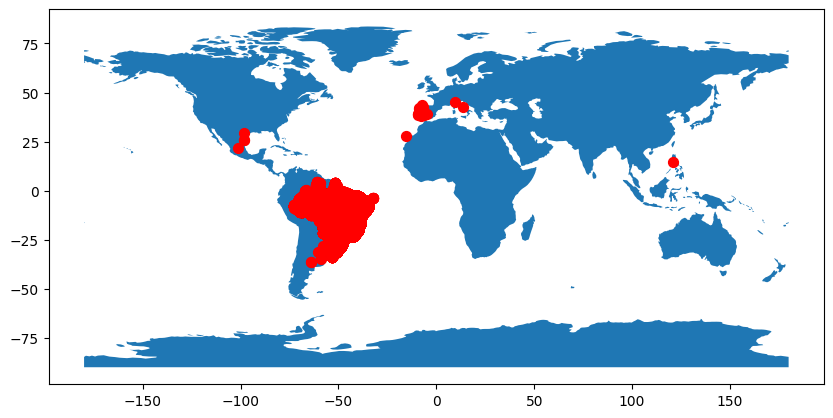

In [68]:
from shapely.geometry import Point
from geopandas import GeoDataFrame
import geodatasets

geometry = [Point(xy) for xy in zip(geolocation_df['geolocation_lng'], geolocation_df['geolocation_lat'])]

gdf = GeoDataFrame(geolocation_df, geometry=geometry)

gdf.set_crs(epsg=4326, inplace=True)

world =  gpd.read_file(geodatasets.data.naturalearth.land['url'])

# Plot peta dunia
ax = world.plot(figsize=(10, 6))

# Plot titik-titik pada peta
gdf.plot(ax=ax, color='red', markersize=50)
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

### Pertanyaan 2:

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2